# Image Classification with Logistic Regression using PyTroch

Here we use MNIST dataset to explore the data and most. 

In [1]:
# import the libararies
import torch as tr
import torchvision as tv
from torchvision.datasets import MNIST as MT
import torchvision.transforms as tf
from torch.utils.data import random_split
import matplotlib.pyplot as plt
%matplotlib inline

### Download the training dataset

In [2]:
# training dataset download
train_data = MT(root='data/', download=True)

In [3]:
len(train_data) # find the leanth of the dataset

60000

In [4]:
test_data = MT(root='data/', train=False)

In [5]:
len(test_data)

10000

### Let's show the image from the dataset
For this, we will use matplotlib for showcase the images.

Label: 9


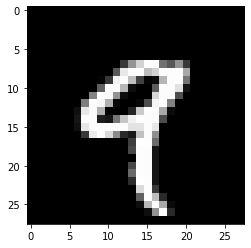

In [6]:
image, label = train_data[4]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [7]:
train_data[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x27FBF076F40>, 5)

Label: 3


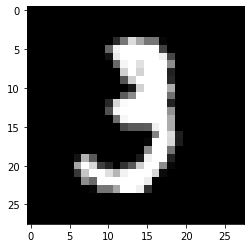

In [8]:
image, label = train_data[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
train_ds = MT(root='data/',
             train=True,
             transform=tf.ToTensor()
             )
test_ds = MT(root='data/',
            train=False,
            transform=tf.ToTensor()
            )

In [10]:
img_tensor, label= train_ds[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


### let's look at some image sample values inside the tensor

In [11]:
print(img_tensor[:, 10:15, 10:15])
print(tr.max(img_tensor), tr.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


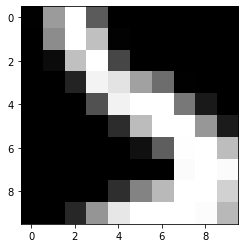

In [12]:
# plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0, 10:20, 10:20], cmap='gray')

### Training and Validation Datasets
we will randomly pick the images from the dataset, for this reason we import the random_split method from PyTorch

In [13]:
train_dataset, val_dataset = random_split(train_ds, [50000, 10000])

In [14]:
# find the lenth of the dataset
len(train_dataset), len(val_dataset)

(50000, 10000)

### DataLoader

In [15]:
# import dataloader library
from torch.utils.data.dataloader import DataLoader

In [16]:
train_loader = DataLoader(train_dataset, batch_size= 100, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=True)